In [88]:
import numpy as np
import os
import netCDF4 as nc
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [79]:
path='C:/Users/anton/Documents/Master2/Memoire/Scripts/ERA5_2024/c52e3bb84232a321fc247eeee3740f35.nc'
data = nc.Dataset(path)
tp_data=data['tp'][:,2,1]
tp_data.shape

(6441,)

In [75]:
tp_data_norm=tp_data-np.median(tp_data)
tp_data_norm[0:20]
#I want to add every 24 values to get the daily precipitation
tp_data_norm_24=np.zeros(365)



c:\Users\anton\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:748: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


masked_array(data=[4.2915344e-06, 2.8610229e-06, 3.8146973e-06,
                   9.5367432e-06, 1.9073486e-05, 4.8637390e-05,
                   1.6355515e-04, 6.1511993e-05, 3.6716461e-05,
                   1.2826920e-04, 6.0558319e-05, 1.8119812e-05,
                   1.9550323e-05, 1.6689301e-05, 1.3971329e-04,
                   5.9175491e-04, 4.9924850e-04, 3.2281876e-04,
                   1.8358231e-04, 5.5789948e-05],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

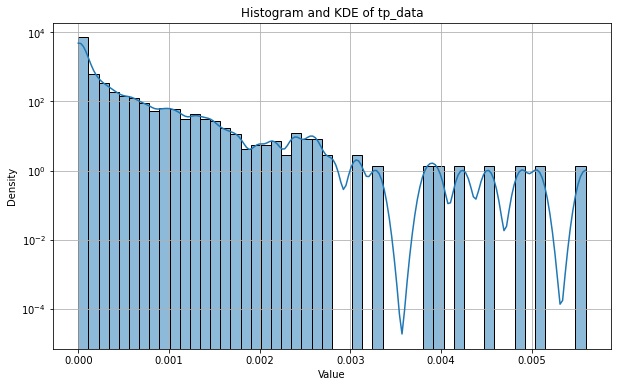

In [89]:
# Assuming tp_data is already defined
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(tp_data, bins=50, kde=True, stat="density", log_scale=(False, True))

# Customize the plot
plt.yscale('log')
plt.grid()
plt.title('Histogram and KDE of tp_data')
plt.xlabel('Value')
plt.ylabel('Density')

# Show the plot
plt.show()

(-0.9928043819093257, 6.667507831103596e-07, 1.2700043949097898e-06)
-0.9928043819093257 6.667507831103596e-07 1.2700043949097898e-06


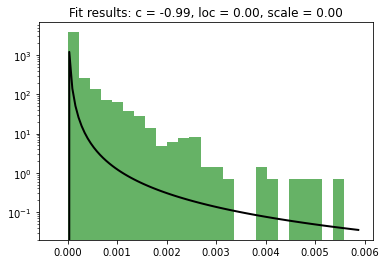

In [83]:
#fit it to  a GEV
from scipy.stats import genextreme as gev
params=gev.fit(tp_data_rounded)
print(params)
c=params[0]
loc=params[1]
scale=params[2]
print(c,loc,scale)

#plot the histogram
plt.hist(tp_data_rounded, bins=25, density=True, alpha=0.6, color='g')
plt.yscale('log')
#plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = gev.pdf(x, c, loc, scale)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: c = %.2f, loc = %.2f, scale = %.2f" % (c, loc, scale)
plt.title(title)

plt.show()
